In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dir_gams = "~/codes/CIAM-Work/gams-outputs/gams-results"

### RCP8.5 baseline results from Diaz 2016

file names

In [5]:
files_rcp85 = ["rcp85p50ref"+str(k)+".csv" for k in range(1,11)]

read the files, place in a list of Pandas DataFrames

In [13]:
dfG_all = []
for file in files_rcp85:
    dfG_all.append(pd.read_csv(dir_gams+"/rcp85/"+file))

In [14]:
dfG1 = dfG_all[0]

concatenate all into a master file. don't worry about the times being out of order; the calculations will specify the year and type of damages to be summed up later

In [17]:
dfG = pd.concat(dfG_all)

remove the list of DataFrames to save on some memory

In [19]:
del dfG_all

In [20]:
dfG["variable"].unique()

array(['FloodRetreat', 'RetreatCost', 'WetlandRetreat', 'RelocateRetreat',
       'StormCapitalRetreat', 'StormPopRetreat', 'Construct',
       'ProtectCost', 'WetlandProtect', 'StormCapitalProtect',
       'StormPopProtect', 'FloodNoAdapt', 'NoAdaptCost', 'WetlandNoAdapt',
       'RelocateNoAdapt', 'StormCapitalNoAdapt', 'StormPopNoAdapt',
       'FloodOptimalFixed', 'OptimalFixedCost', 'WetlandOptimalFixed',
       'RelocateOptimalFixed', 'StormCapitalOptimalFixed',
       'StormPopOptimalFixed', 'ConstructOptimalFixed'], dtype=object)

Gather up Diaz 2016 results into a DataFrame

In [62]:
NoAdaptCost, OptimalCost, FloodNoAdapt, WetlandNoAdapt, RelocateNoAdapt, StormCapitalNoAdapt, StormPopNoAdapt, WetlandRetreat, WetlandProtect = [], [], [], [], [], [], [], [], []
Construct10, ProtectCost10, StormPopProtect10, StormCapitalProtect10 = [], [], [], []
Construct10000, ProtectCost10000, StormPopProtect10000, StormCapitalProtect10000 = [], [], [], []
RetreatCost10, StormPopRetreat10, StormCapitalRetreat10, RelocateRetreat10 = [], [], [], []
RetreatCost10000, StormPopRetreat10000, StormCapitalRetreat10000, RelocateRetreat10000 = [], [], [], []
for t in range(1,11):
    NoAdaptCost.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="NoAdaptCost"), "value"].sum())
    OptimalCost.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="OptimalFixedCost"), "value"].sum())
    FloodNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="FloodNoAdapt"), "value"].sum())
    WetlandNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="WetlandNoAdapt"), "value"].sum())
    RelocateNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="RelocateNoAdapt"), "value"].sum())
    StormCapitalNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="StormCapitalNoAdapt"), "value"].sum())
    StormPopNoAdapt.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="StormPopNoAdapt"), "value"].sum())
    WetlandRetreat.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="WetlandRetreat"), "value"].sum())
    WetlandProtect.append(dfG.loc[(dfG["time"]==t) & (dfG["variable"]=="WetlandProtect"), "value"].sum())
    Construct10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="ConstructOptimalFixed"), "value"].sum())
    ProtectCost10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="ProtectCost"), "value"].sum())
    StormPopProtect10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormPopProtect"), "value"].sum())
    StormCapitalProtect10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormCapitalProtect"), "value"].sum())
    RetreatCost10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="RetreatCost"), "value"].sum())
    StormPopRetreat10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormPopRetreat"), "value"].sum())
    StormCapitalRetreat10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="StormCapitalRetreat"), "value"].sum())
    RelocateRetreat10.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10) & (dfG["variable"]=="RelocateRetreat"), "value"].sum())
    Construct10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="ConstructOptimalFixed"), "value"].sum())
    ProtectCost10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="ProtectCost"), "value"].sum())
    StormPopProtect10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="StormPopProtect"), "value"].sum())
    StormCapitalProtect10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["level"]==10000) & (dfG["variable"]=="StormCapitalProtect"), "value"].sum())
    RetreatCost10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="RetreatCost"), "value"].sum())
    StormPopRetreat10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="StormPopRetreat"), "value"].sum())
    StormCapitalRetreat10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="StormCapitalRetreat"), "value"].sum())
    RelocateRetreat10000.append(dfG.loc[(dfG["time"]==t) & (dfG["level"]==10000) & (dfG["variable"]=="RelocateRetreat"), "value"].sum())

dfDiaz = pd.DataFrame()
dfDiaz["time"] = list(range(2010,2110,10))
dfDiaz["NoAdapt"] = NoAdaptCost
dfDiaz["Optimal"] = OptimalCost
dfDiaz["FloodNoAdapt"] = FloodNoAdapt
dfDiaz["WetlandNoAdapt"] = WetlandNoAdapt
dfDiaz["RelocateNoAdapt"] = RelocateNoAdapt
dfDiaz["StormCapitalNoAdapt"] = StormCapitalNoAdapt
dfDiaz["StormPopNoAdapt"] = StormPopNoAdapt
dfDiaz["WetlandProtect"] = WetlandProtect
dfDiaz["Construct"] = Construct
dfDiaz["WetlandRetreat"] = WetlandRetreat
dfDiaz["ProtectCost10"] = ProtectCost10
dfDiaz["StormPopProtect10"] = StormPopProtect10
dfDiaz["StormCapitalProtect10"] = StormCapitalProtect10
dfDiaz["RetreatCost10"] = RetreatCost10
dfDiaz["StormPopRetreat10"] = StormPopRetreat10
dfDiaz["StormCapitalRetreat10"] = StormCapitalRetreat10
dfDiaz["RelocateRetreat10"] = RelocateRetreat10
dfDiaz["ProtectCost10000"] = ProtectCost10000
dfDiaz["StormPopProtect10000"] = StormPopProtect10000
dfDiaz["StormCapitalProtect10000"] = StormCapitalProtect10000
dfDiaz["RetreatCost10000"] = RetreatCost10000
dfDiaz["StormPopRetreat10000"] = StormPopRetreat10000
dfDiaz["StormCapitalRetreat10000"] = StormCapitalRetreat10000
dfDiaz["RelocateRetreat10000"] = RelocateRetreat10000

Matches the paper well (Fig 2, right column), except in the last year when things jump up just a bit too much. Paper reports \\$2.2T in the NoAdapt case and \\$270B in the Optimal adaptation case.

In [12]:
print(np.round(dfDiaz[["time","NoAdapt","Optimal"]],2))

   time  NoAdapt  Optimal
0  2010   119.17    29.27
1  2020   189.34    33.03
2  2030   304.23    39.72
3  2040   484.77    52.75
4  2050   787.10   115.54
5  2060  1217.03   132.09
6  2070  1566.37   148.21
7  2080  1878.13   163.73
8  2090  2043.67   178.02
9  2100  2251.46   282.07


### New results

In [39]:
dfC = pd.read_csv("./output/lslOld_pop0_global_85p50ssp0fixed_control_all.csv")

Format in same way as the Diaz DataFrame

In [63]:
dfDiaz.head(2)

,time,NoAdapt,Optimal,FloodNoAdapt,WetlandNoAdapt,RelocateNoAdapt,StormCapitalNoAdapt,StormPopNoAdapt,WetlandProtect,Construct,...,StormPopRetreat10,StormCapitalRetreat10,RelocateRetreat10,ProtectCost10000,StormPopProtect10000,StormCapitalProtect10000,RetreatCost10000,StormPopRetreat10000,StormCapitalRetreat10000,RelocateRetreat10000
0,2010,119.165659,29.273827,40.340354,2.091422,74.456758,1.022545,1.254591,325.712100,8.482219,...,33.605453,21.744591,18.567334,1509.112733,0.000060,0.000024,181.409253,0.000004,0.000001,6.536323
1,2020,189.336408,33.032347,64.955127,5.568556,112.938837,2.515516,3.358392,375.705667,8.482219,...,60.938305,41.684820,18.567334,1535.010673,0.000132,0.000058,184.886392,0.000007,0.000003,6.536323


In [64]:
dfNew = pd.DataFrame()
dfNew["time"] = dfDiaz.time
dfNew["NoAdapt"] = list(dfC.loc[(dfC.variable=="NoAdaptCost") & (dfC.time <= 10), "value"])
dfNew["Optimal"] = list(dfC.loc[(dfC.variable=="OptimalCost") & (dfC.time <= 10), "value"])
dfNew["FloodNoAdapt"] = list(dfC.loc[(dfC.variable=="FloodNoAdapt") & (dfC.time <= 10), "value"])
dfNew["WetlandNoAdapt"] = list(dfC.loc[(dfC.variable=="WetlandNoAdapt") & (dfC.time <= 10), "value"])
dfNew["RelocateNoAdapt"] = list(dfC.loc[(dfC.variable=="RelocateNoAdapt") & (dfC.time <= 10), "value"])
dfNew["StormCapitalNoAdapt"] = list(dfC.loc[(dfC.variable=="StormCapitalNoAdapt") & (dfC.time <= 10), "value"])
dfNew["StormPopNoAdapt"] = list(dfC.loc[(dfC.variable=="StormPopNoAdapt") & (dfC.time <= 10), "value"])
dfNew["ProtectCost10"] = list(dfC.loc[(dfC.variable=="ProtectCost") & (dfC.level==10) & (dfC.time <= 10), "value"])
dfNew["RetreatCost10"] = list(dfC.loc[(dfC.variable=="RetreatCost") & (dfC.level==10) & (dfC.time <= 10), "value"])
dfNew["ProtectCost10000"] = list(dfC.loc[(dfC.variable=="ProtectCost") & (dfC.level==10000) & (dfC.time <= 10), "value"])
dfNew["RetreatCost10000"] = list(dfC.loc[(dfC.variable=="RetreatCost") & (dfC.level==10000) & (dfC.time <= 10), "value"])

Define a function to compare the old results (Diaz 2016) to the new ones (this work), with the baseline model configuration. The baseline configuration should match the forcings/inputs for the Diaz 2016 results.

In [40]:
def compare(dfD, dfN, var, lev=False, times=list(range(1,11)), verbose=True):
    varD = var
    names = {"OptimalCost" : "OptimalFixedCost"}#, "Construct" : "ConstructOptimalFixed"}
    if var in names.keys():
        varD = names[var]
    if lev:
        D = [dfD.loc[(dfD.variable==varD) & (dfD.level==lev) & (dfD.time==t), "value"].sum() for t in times]
        N = list(dfN.loc[(dfN.variable==var) & (dfN.level==lev) & (dfN.time>=times[0]) & (dfN.time<=np.max(times)), "value"])
    else:
        D = [dfD.loc[(dfD.variable==varD) & (dfD.time==t), "value"].sum() for t in times]
        N = list(dfN.loc[(dfN.variable==var) & (dfN.time>=times[0]) & (dfN.time<=np.max(times)), "value"])
    if verbose:
        print("time | Diaz | New")
        for t in range(len(times)):
            print(times[t], np.round(D[t],3), np.round(N[t],3))
    return [N[t]-D[t] for t in range(len(times))]

Checking NoAdaptCost...

In [41]:
x = compare(dfG, dfC, var="NoAdaptCost", lev=False, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 119.166 119.166
2 189.336 189.336
3 304.226 304.226
4 484.775 484.775
5 787.095 787.095
6 1217.032 1217.038
7 1566.374 1566.376
8 1878.132 1878.142
9 2043.672 2043.716
10 2251.458 2251.467
11 2635.751 2635.751


Checking OptimalCost...

In [42]:
x = compare(dfG, dfC, var="OptimalCost", lev=False, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 29.274 27.608
2 33.032 31.593
3 39.718 38.638
4 52.752 52.064
5 115.535 124.3
6 132.086 143.298
7 148.209 161.838
8 163.731 180.723
9 178.017 197.697
10 282.067 325.643
11 303.188 352.242


Check RetreatCost...

In [43]:
x = compare(dfG, dfC, var="RetreatCost", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 123.019 123.019
2 173.769 173.769
3 277.287 277.287
4 496.142 496.142
5 279.418 279.418
6 327.637 327.637
7 407.305 407.305
8 549.06 549.06
9 847.47 847.47
10 577.476 577.476
11 624.229 624.229


Check ProtectCost...

In [44]:
x = compare(dfG, dfC, var="ProtectCost", lev=10, times=list(range(1,12)), verbose=True)

time | Diaz | New
1 831.335 825.021
2 1333.589 1327.242
3 2411.871 2405.524
4 4775.877 4769.533
5 1339.202 1324.868
6 2118.873 2104.537
7 3735.674 3721.331
8 7285.422 7271.073
9 15344.465 15330.11
10 2325.17 2313.425
11 3528.217 3516.475


### Figure: total no-adaptation costs over time

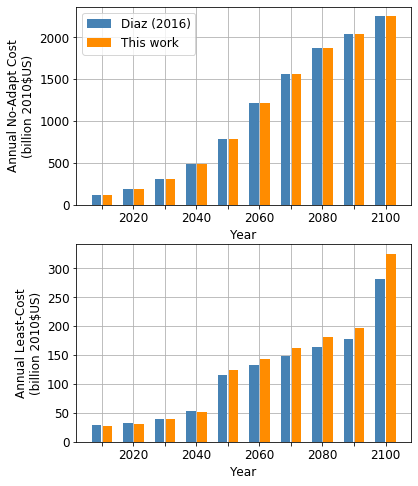

In [104]:
sep = 1.8
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
ax[0].bar(x=dfDiaz.time-sep, height=dfDiaz.NoAdapt, width=3, color="steelblue", label="Diaz (2016)")
ax[0].bar(x=dfNew.time+sep, height=dfNew.NoAdapt, width=3, color="darkorange", label="This work")
ax[0].grid(); ax[0].set_axisbelow(True)
yticks = [0,500,1000,1500,2000]; ax[0].set_yticks(yticks); ax[0].set_yticklabels(yticks, fontsize=12)
ax[0].set_xticks(range(2010,2110,10)); ax[0].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[0].set_xlabel("Year", fontsize=12); ax[0].set_ylabel("Annual No-Adapt Cost\n(billion 2010$US)", fontsize=12)
ax[0].legend(fontsize=12)
ax[1].bar(x=dfDiaz.time-sep, height=dfDiaz.Optimal, width=3, color="steelblue", label="Diaz (2016)")
ax[1].bar(x=dfNew.time+sep, height=dfNew.Optimal, width=3, color="darkorange", label="This work")
ax[1].grid(); ax[1].set_axisbelow(True)
yticks = [0,50,100,150,200,250,300]; ax[1].set_yticks(yticks); ax[1].set_yticklabels(yticks, fontsize=12)
ax[1].set_xticks(range(2010,2110,10)); ax[1].set_xticklabels(["",2020,"",2040,"",2060,"",2080,"",2100], fontsize=12)
ax[1].set_xlabel("Year", fontsize=12); ax[1].set_ylabel("Annual Least-Cost\n(billion 2010$US)", fontsize=12);
fig.savefig("baseline_comparison_rcp85.pdf", bbox_inches='tight');

<br>

# potentially useful leftover code down here

<br>

In [68]:
cols = ["NoAdapt","Optimal","ProtectCost10", "ProtectCost10000", "RetreatCost10", "RetreatCost10000"]
print(dfNew[cols].head())
print(dfDiaz[cols].head())

      NoAdapt     Optimal  ProtectCost10  ProtectCost10000  RetreatCost10  \
0  119.165655   27.608270     825.021255       1536.302152     123.018517   
1  189.336419   31.593465    1327.241902       1562.200092     173.768731   
2  304.225874   38.638103    2405.524340       1588.882051     277.287446   
3  484.774691   52.064445    4769.533069       1616.968968     496.142072   
4  787.095427  124.300290    1324.867938       1983.323531     279.417833   

   RetreatCost10000  
0        181.409252  
1        184.886392  
2        189.913469  
3        197.066968  
4        446.842933  
      NoAdapt     Optimal  ProtectCost10  ProtectCost10000  RetreatCost10  \
0  119.165659   29.273827     831.334827       1509.112733     123.018521   
1  189.336408   33.032347    1333.588598       1535.010673     173.768736   
2  304.225858   39.717721    2411.871069       1561.692632     277.287449   
3  484.774707   52.751554    4775.877290       1589.779549     496.142077   
4  787.095398  115.5